Notebook only fro one plot of the survey.

In [6]:
using Plots
using LaTeXStrings
using Printf

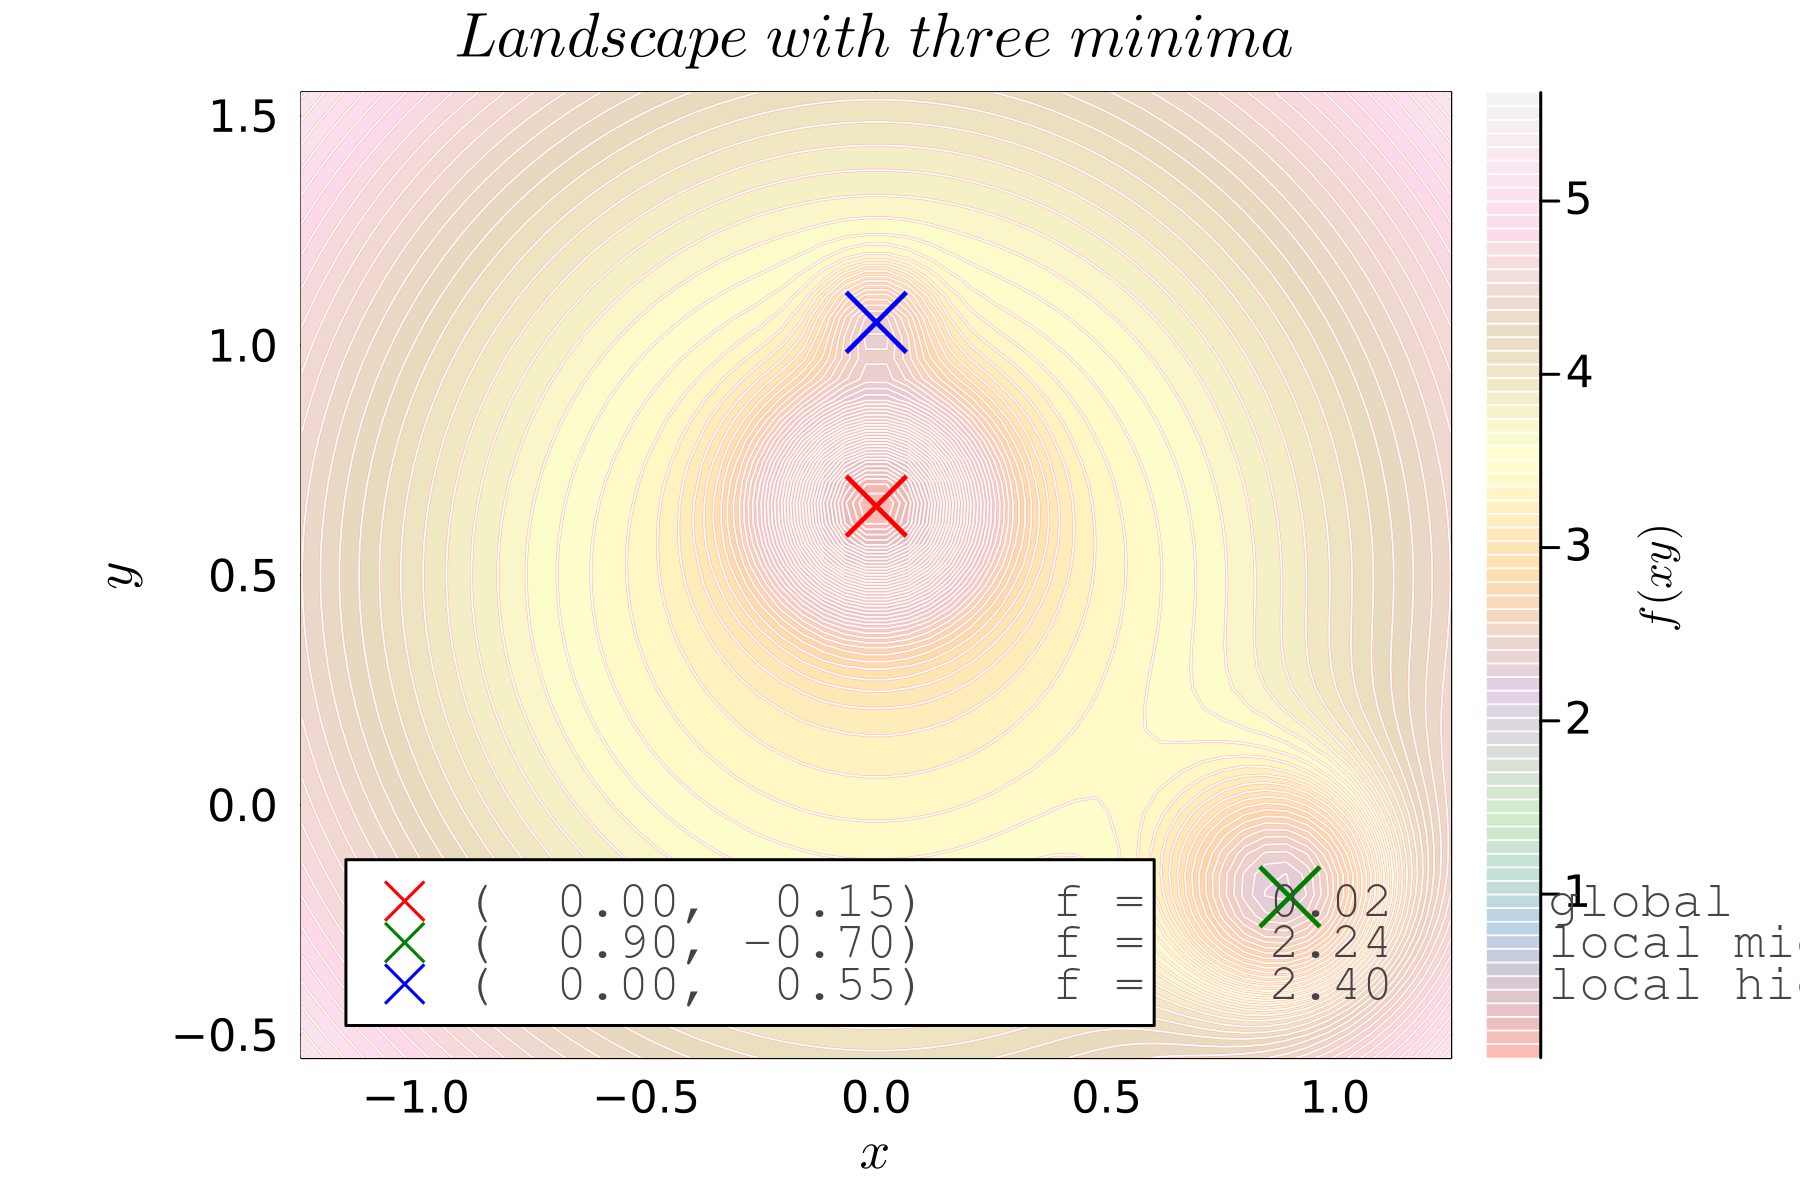

In [11]:
gr()

# --- style pastel + légende alignée en bas/gauche ---
default(fmt=:svg, dpi=300, framestyle=:box, legend=:bottomleft, legendfont=font("DejaVu Sans Mono", 9))

# --- paramètres : 3 puits (profondeurs réglées pour global < mid < high) ---
xg, yg, Ag, σg = 0.0,  0.15, 3.20, 0.16   # global (le plus profond), x=0
xl, yl, Al, σl = 0.0,  0.55, 0.90, 0.08   # local high (plus haut), x=0, puits étroit
x3, y3, A3, σ3 = 0.90, -0.70, 2.00, 0.18  # local mid (entre les deux), coordonnées non nulles

well(x,y,x0,y0,A,σ) = -A * exp(-((x-x0)^2 + (y-y0)^2) / (2σ^2))

# décalage vertical voulu : y -> y - 0.5 dans la fonction
f(x,y) = 3.2+ 0.8*(x^2 + (y-0.5)^2) +
         well(x, y-0.5, xg, yg, Ag, σg) +
         well(x, y-0.5, xl, yl, Al, σl) +
         well(x, y-0.5, x3, y3, A3, σ3)

# --- grille & valeurs ---
xs = range(-1.35, 1.35; length=60)
ys = range(-1.10+0.5, 1.10+0.5; length=50)
Z  = [f(x,y) for y in ys, x in xs]

# ordre explicite : global < mid < high
f_g   = f(xg, yg+0.5)
f_mid = f(x3, y3+0.5)
f_high= f(xl, yl+0.5)

# --- tracé ---
levels_n = 70
pal = cgrad(:Pastel1, levels_n; categorical=false)

plt = contourf(xs, ys, Z; levels=levels_n, c=pal, alpha=0.90,
               xlabel=L"$x$", ylabel=L"$y$", colorbar_title=L"$f(x y)$",
               legend=:bottomleft,
               aspect_ratio=1, title=L"Landscape \ with \ three \ minima")
contour!(xs, ys, Z; levels=levels_n, c=:white, lw=0.6, alpha=0.95, label="")

# légende tabulée (espaces insécables)
nbsp(s::AbstractString) = replace(s, ' ' => '\u00A0')
lab_g   = @sprintf("(%6.2f,%6.2f)    f = %7.2f     global",     xg, yg, f_g)     |> nbsp
lab_mid = @sprintf("(%6.2f,%6.2f)    f = %7.2f     local mid",  x3, y3, f_mid)   |> nbsp
lab_hi  = @sprintf("(%6.2f,%6.2f)    f = %7.2f     local high", xl, yl, f_high)  |> nbsp

scatter!(plt, [xg], [yg+0.5]; marker=(:x, 10), msw=2, color=:red,   label=lab_g)
scatter!(plt, [x3], [y3+0.5]; marker=(:x, 10), msw=2, color=:green, label=lab_mid)
scatter!(plt, [xl], [yl+0.5]; marker=(:x, 10), msw=2, color=:blue,  label=lab_hi)

xlims!(-1.25, 1.25); ylims!(-1.05+0.5, 1.05+0.5)



In [12]:
savefig(plt, "landscape_three_minima.svg")
println("Saved to landscape_three_minima_pastel.svg")

Saved to landscape_three_minima_pastel.svg
